## Imports

In [38]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

import numba

from tqdm import tqdm 
import os


plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.dpi'] = 100

In [2]:
a_path = 'data/a_an_example.in.txt'
b_path = 'data/b_better_start_small.in.txt'
c_path = 'data/c_collaboration.in.txt'
d_path = 'data/d_dense_schedule.in.txt'
e_path = 'data/e_exceptional_skills.in.txt'
f_path = 'data/f_find_great_mentors.in.txt'

In [35]:
def load(file_name):
    with open(file_name, 'r') as file:

        # Read first line 
        C, P = [int(i) for i in file.readline().rstrip().split(' ')]

        print(f"Loading {C}, {P} Contributors, Projects")

        contributors = {}
        for i in tqdm(range(C), desc='Contribs'):
            name, N = file.readline().rstrip().split(' ')
            skills = []
            for j in range(int(N)):
                s, lvl = file.readline().rstrip().split(' ')
                skills += [(s, int(lvl))]

            contributors[name] = skills

        projects = {}
        for i in tqdm(range(P), desc='Projects'):
            name, D, S, B, R = file.readline().rstrip().split(' ')
            roles = []
            for j in range(int(R)):
                s, lvl = file.readline().rstrip().split(' ')
                roles += [(s, lvl)]

            projects[name] = dict(
                D=int(D), S=int(S), B=int(B), R=int(R),
                roles=roles
            )

        print(f"")

        return contributors, projects

In [47]:
def project_distribution(data):
    contribs, projects = data 

    D = np.array([projects[p]['D'] for p in projects.keys()])
    S = np.array([projects[p]['S'] for p in projects.keys()])
    B = np.array([projects[p]['B'] for p in projects.keys()])
    R = np.array([projects[p]['R'] for p in projects.keys()])

    fig, ax = plt.subplots(2, 2)
    ax = ax.flatten()

    ax[0].hist(D, bins=20)
    ax[0].set_title("Number of Days, D")
    
    ax[1].hist(S, bins=20)
    ax[1].set_title("Score, S")

    ax[2].hist(B, bins=20)
    ax[2].set_title("Best before, B")

    ax[3].hist(R, bins=20)
    ax[3].set_title("Number of roles, R")

    plt.show()

    fig, axs = plt.subplots(1, 3)
    axs[0].scatter(D, S)
    axs[0].set_xlabel("Number of Days, D")
    axs[0].set_ylabel("Score, S")

    axs[1].scatter(B, S)
    axs[1].set_xlabel("Best before, B")
    axs[1].set_ylabel("Score, S")

    axs[2].scatter(R, S)
    axs[2].set_xlabel("Number of roles, R")
    axs[2].set_ylabel("Score, S")
    fig.set_size_inches(12, 4)
    plt.show()

In [ ]:
def project_distribution(data):
    contribs, projects = data 

    skills = {} 
    for person, p_skills


## A

In [10]:
a_data = load(a_path)

Loading 3, 3 Contributors, Projects


Projects: 100%|██████████| 3/3 [00:00<00:00, 2990.24it/s]


In [36]:
a_data

({'Anna': [('C++', 2)],
  'Bob': [('HTML', 5), ('CSS', 5)],
  'Maria': [('Python', 3)]},
 {'Logging': {'D': 5, 'S': 10, 'B': 5, 'R': 1, 'roles': [('C++', '3')]},
  'WebServer': {'D': 7,
   'S': 10,
   'B': 7,
   'R': 2,
   'roles': [('HTML', '3'), ('C++', '2')]},
  'WebChat': {'D': 10,
   'S': 20,
   'B': 20,
   'R': 2,
   'roles': [('Python', '3'), ('HTML', '3')]}})

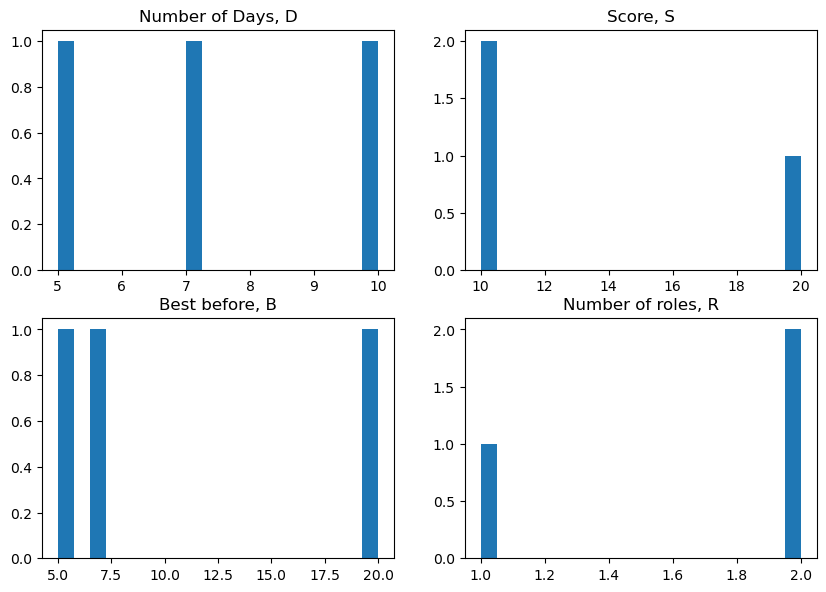

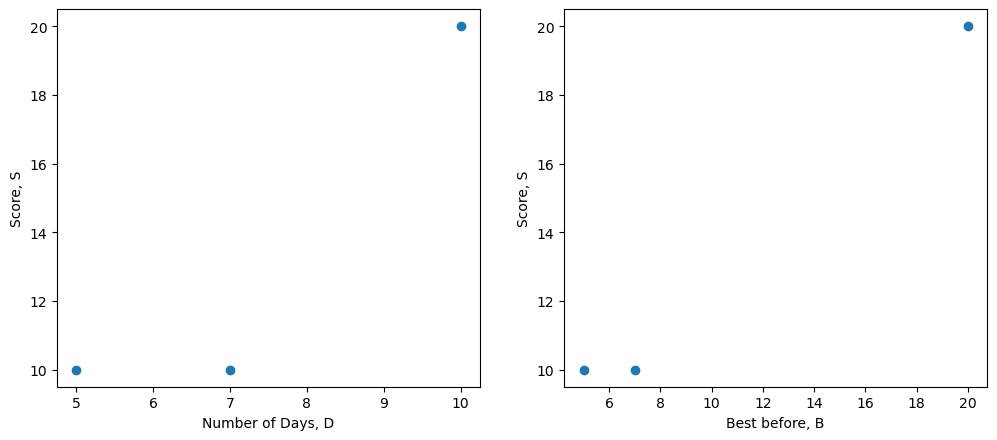

In [42]:
project_distribution(a_data)

## B

In [23]:
b_data = load(b_path)

Loading 50, 100 Contributors, Projects


Projects: 100%|██████████| 100/100 [00:00<00:00, 49648.48it/s]

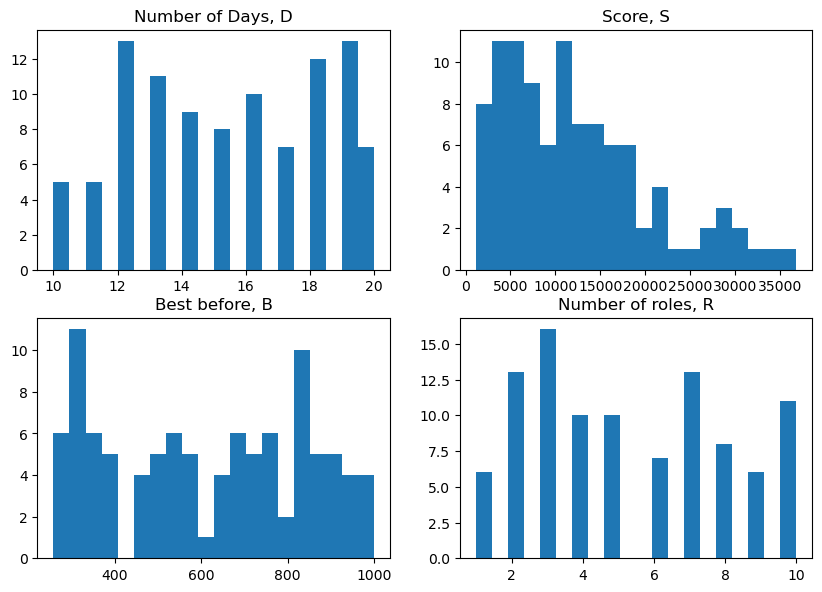

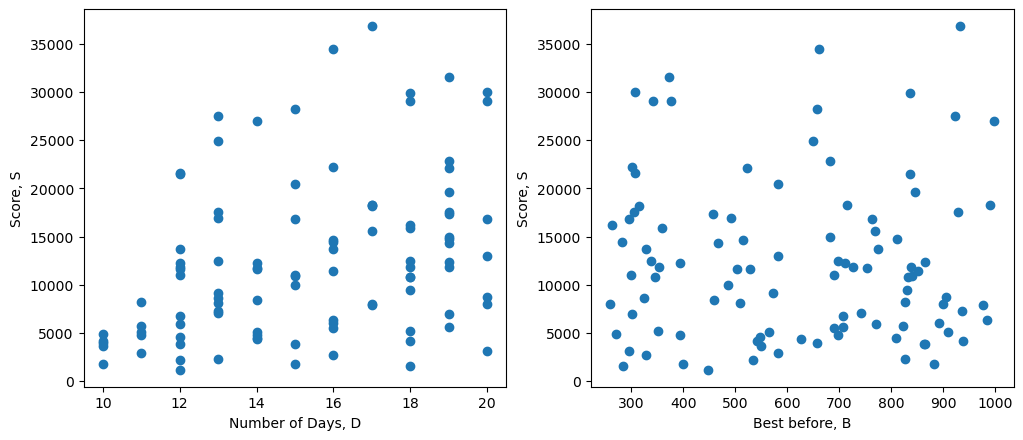

In [43]:
project_distribution(b_data)

## C

In [44]:
c_data = load(c_path)

Loading 1500, 1000 Contributors, Projects


Projects: 100%|██████████| 1000/1000 [00:00<00:00, 16691.62it/s]

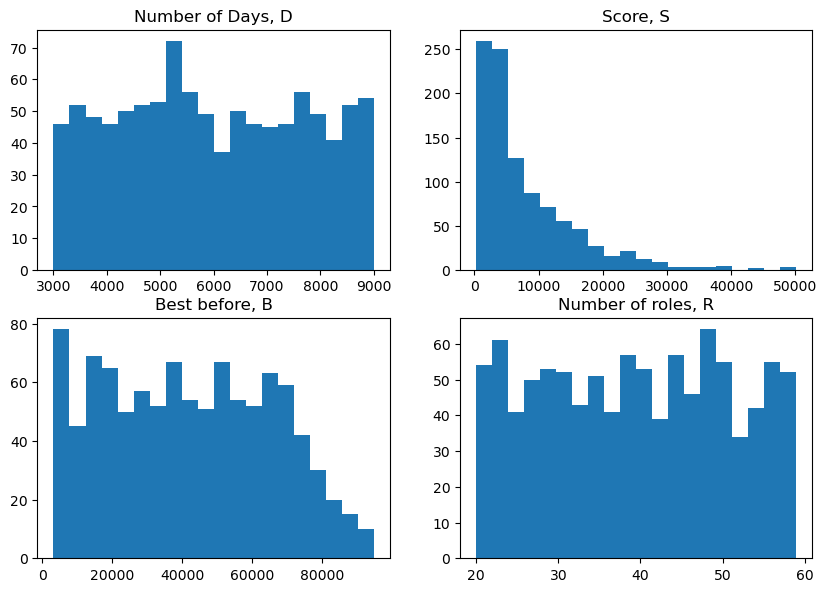

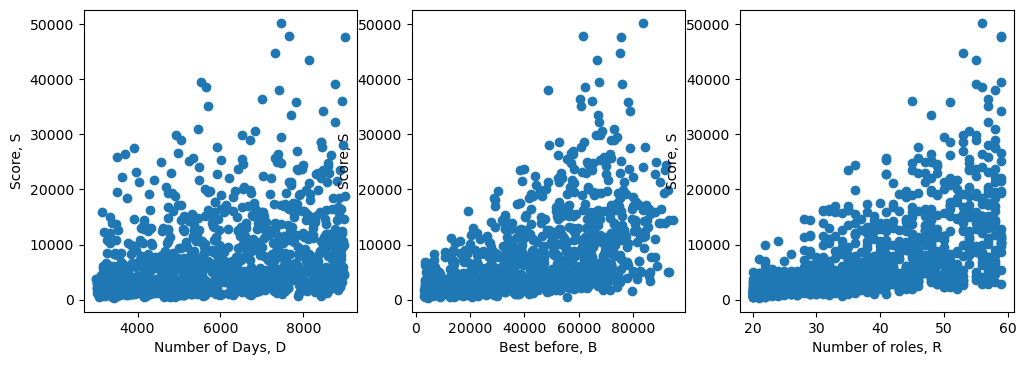

In [48]:
project_distribution(c_data)

## D

In [13]:
d_data = load(d_path)

Loading 500, 1000 Contributors, Projects


Projects: 100%|██████████| 1000/1000 [00:00<00:00, 38470.68it/s]


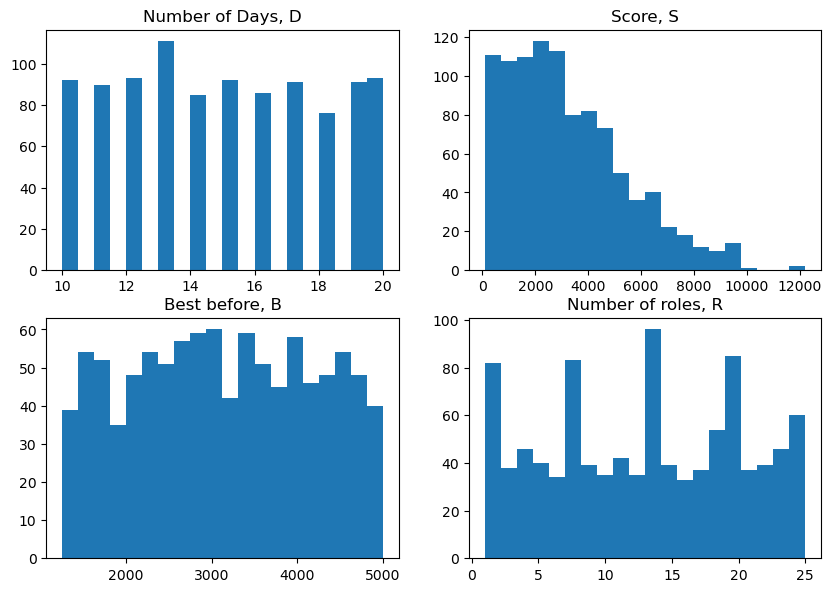

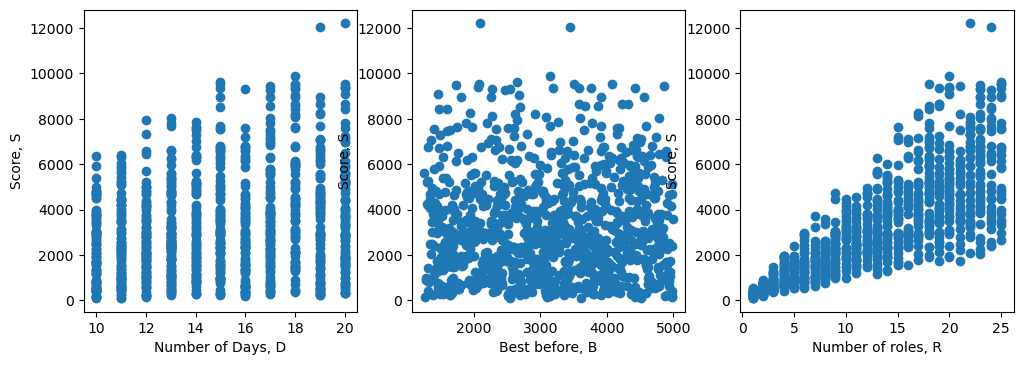

In [50]:
project_distribution(d_data)

## E

In [14]:
e_data = load(e_path)

Loading 800, 10000 Contributors, Projects


Projects: 100%|██████████| 10000/10000 [00:00<00:00, 60901.14it/s]


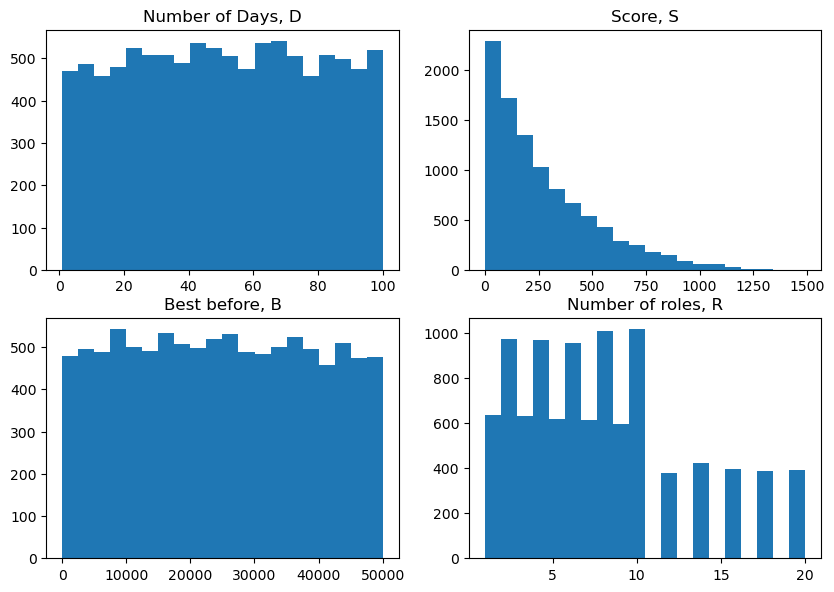

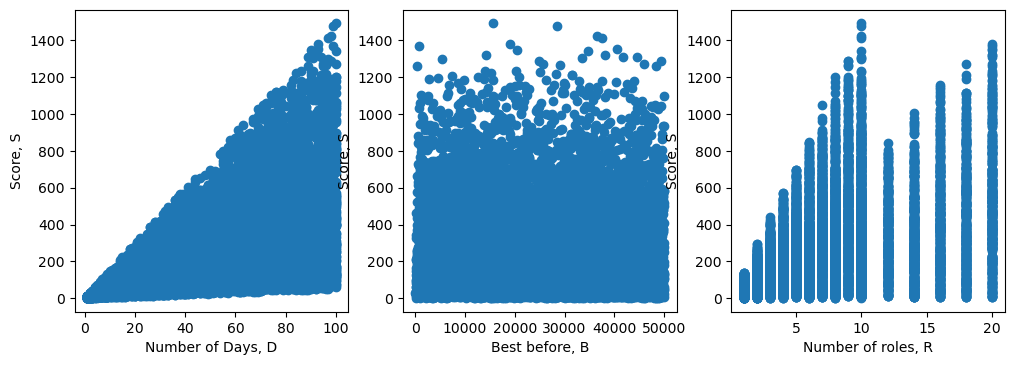

In [51]:
project_distribution(e_data)

## F

In [15]:
f_data = load(f_path)

Loading 1000, 19413 Contributors, Projects


Projects: 100%|██████████| 19413/19413 [00:01<00:00, 19063.38it/s]


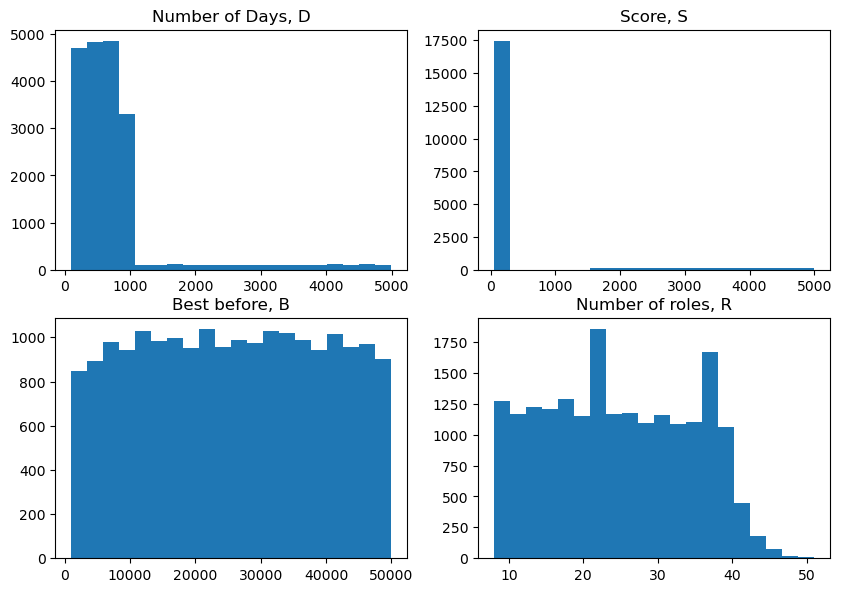

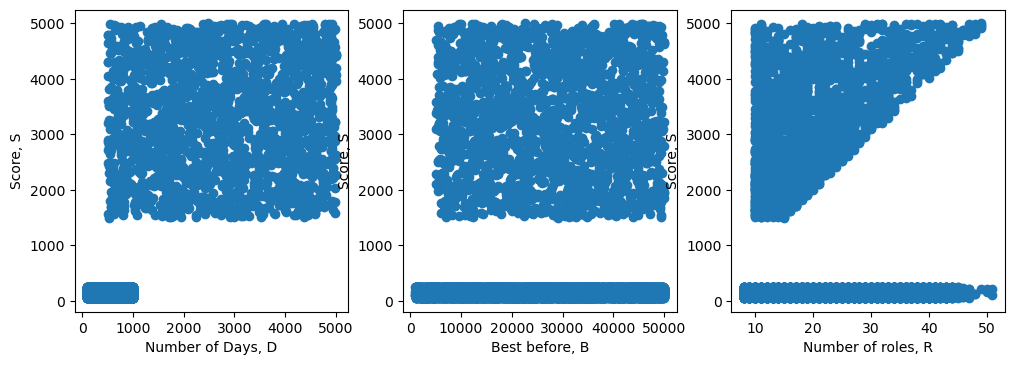

In [52]:
project_distribution(f_data)